In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fft_analysis(signal):
    slope, intercept = np.polyfit(np.arange(len(signal)), signal, 1)
    trend = np.arange(len(signal)) * slope + intercept
    detrended = signal - trend
    fft_values = np.fft.fft(detrended)
    frequencies = np.fft.fftfreq(len(fft_values))
    # Remove negative frequencies and sort
    positive_frequencies = frequencies[frequencies > 0]
    magnitudes = np.abs(fft_values)[frequencies > 0]
    # Identify dominant frequency
    dominant_frequency = positive_frequencies[np.argmax(magnitudes)]
    #print(f"Dominant Frequency: {dominant_frequency:.3f}")
    # Convert frequency to period (e.g., days, weeks, months, etc.)
    dominant_period = 1 / dominant_frequency
    #print(f"Dominant Period: {dominant_period:.2f} time units")
    return dominant_frequency

In [69]:
import os

def process_file(file_path):
    data = pd.read_csv(file_path)

    # Ajustar los nombres de columnas si es necesario
    data.columns = [
        "tachometer",
        "acc_under_axial",
        "acc_under_radiale",
        "acc_under_tangencial",
        "acc_over_axial",
        "acc_over_radiale",
        "acc_over_tangencial",
        "microphone",
    ]

    # Diccionario para estadísticas
    statistics_dict = {}

    for col in data.columns:
        statistics_dict[f'{col}_mean'] = data[col].mean()
        statistics_dict[f'{col}_median'] = data[col].median()
        statistics_dict[f'{col}_std'] = data[col].std()
        statistics_dict[f'{col}_variance'] = data[col].var()
        statistics_dict[f'{col}_range'] = data[col].max() - data[col].min()
        statistics_dict[f'{col}_skewness'] = data[col].skew()
        statistics_dict[f'{col}_kurtosis'] = data[col].kurt()
        statistics_dict[f'{col}_dominant_frequency'] = fft_analysis(data[col])

    # Añadir etiqueta basada en la ruta del archivo
    label = "_".join(os.path.normpath(file_path).split(os.sep)[-3:-1])  # Ajustar según la estructura
    statistics_dict['label'] = label

    return statistics_dict


# Recorrer todas las carpetas y procesar los archivos
def process_directory(root_dir):
    all_statistics = []

    for subdir, _, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                print(f"Procesando archivo: {file_path}")
                try:
                    stats = process_file(file_path)
                    all_statistics.append(stats)
                except Exception as e:
                    print(f"Error procesando {file_path}: {e}")

    # Combinar todos los resultados en un solo DataFrame
    combined_df = pd.DataFrame(all_statistics)
    return combined_df

def process_directory_reduced(root_dir):
    all_statistics = []

    # Definir las carpetas de interés
    target_dirs = ["horizontal-misalignment", "vertical-misalignment"]

    for subdir, _, files in os.walk(root_dir):
        # Filtrar carpetas relevantes
        if any(target_dir in subdir for target_dir in target_dirs):
            for file in files:
                if file.endswith(".csv"):
                    file_path = os.path.join(subdir, file)
                    # print(f"Procesando archivo: {file_path}")
                    try:
                        stats = process_file(file_path)
                        all_statistics.append(stats)
                    except Exception as e:
                        print(f"Error procesando {file_path}: {e}")

    # Combinar todos los resultados en un solo DataFrame
    combined_df = pd.DataFrame(all_statistics)
    return combined_df

# Ruta principal donde están las carpetas
root_dir = './bearing_fault_detection_reduced'
output_csv_path = 'combined_statistics.csv'
output_csv_path_reduced = 'combined_statistics_reduced.csv'

# Procesar directorio y guardar resultados
combined_df = process_directory(root_dir)
combined_df.to_csv(output_csv_path, index=False)

reduced_df = process_directory_reduced(root_dir)
combined_df.to_csv(output_csv_path_reduced, index=False)

print(f"Archivo grande combinado guardado en: {output_csv_path}")
print(f"Archivo pequeño combinado guardado en: {output_csv_path}")


Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\12.288.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\30.3104.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\50.176.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\0.5mm\62.0544.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\12.288.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\30.5152.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignment\1.0mm\50.176.csv
Procesando archivo: ./bearing_fault_detection_reduced\bearing_fault_detection_reduced\horizontal-misalignmen

IN HAU : mapa de color de las correlaciones,
los que estan por debajo de un umbral kitar (de la barianza, kusi denboakiko barianza ze iual ezta eze aldatzen ta ezto ezertako balio)

hacer un PCA a todos las 59 (columnas), y coger las primeras y vemos cuales son los k más afektan a esta pa coger esas.

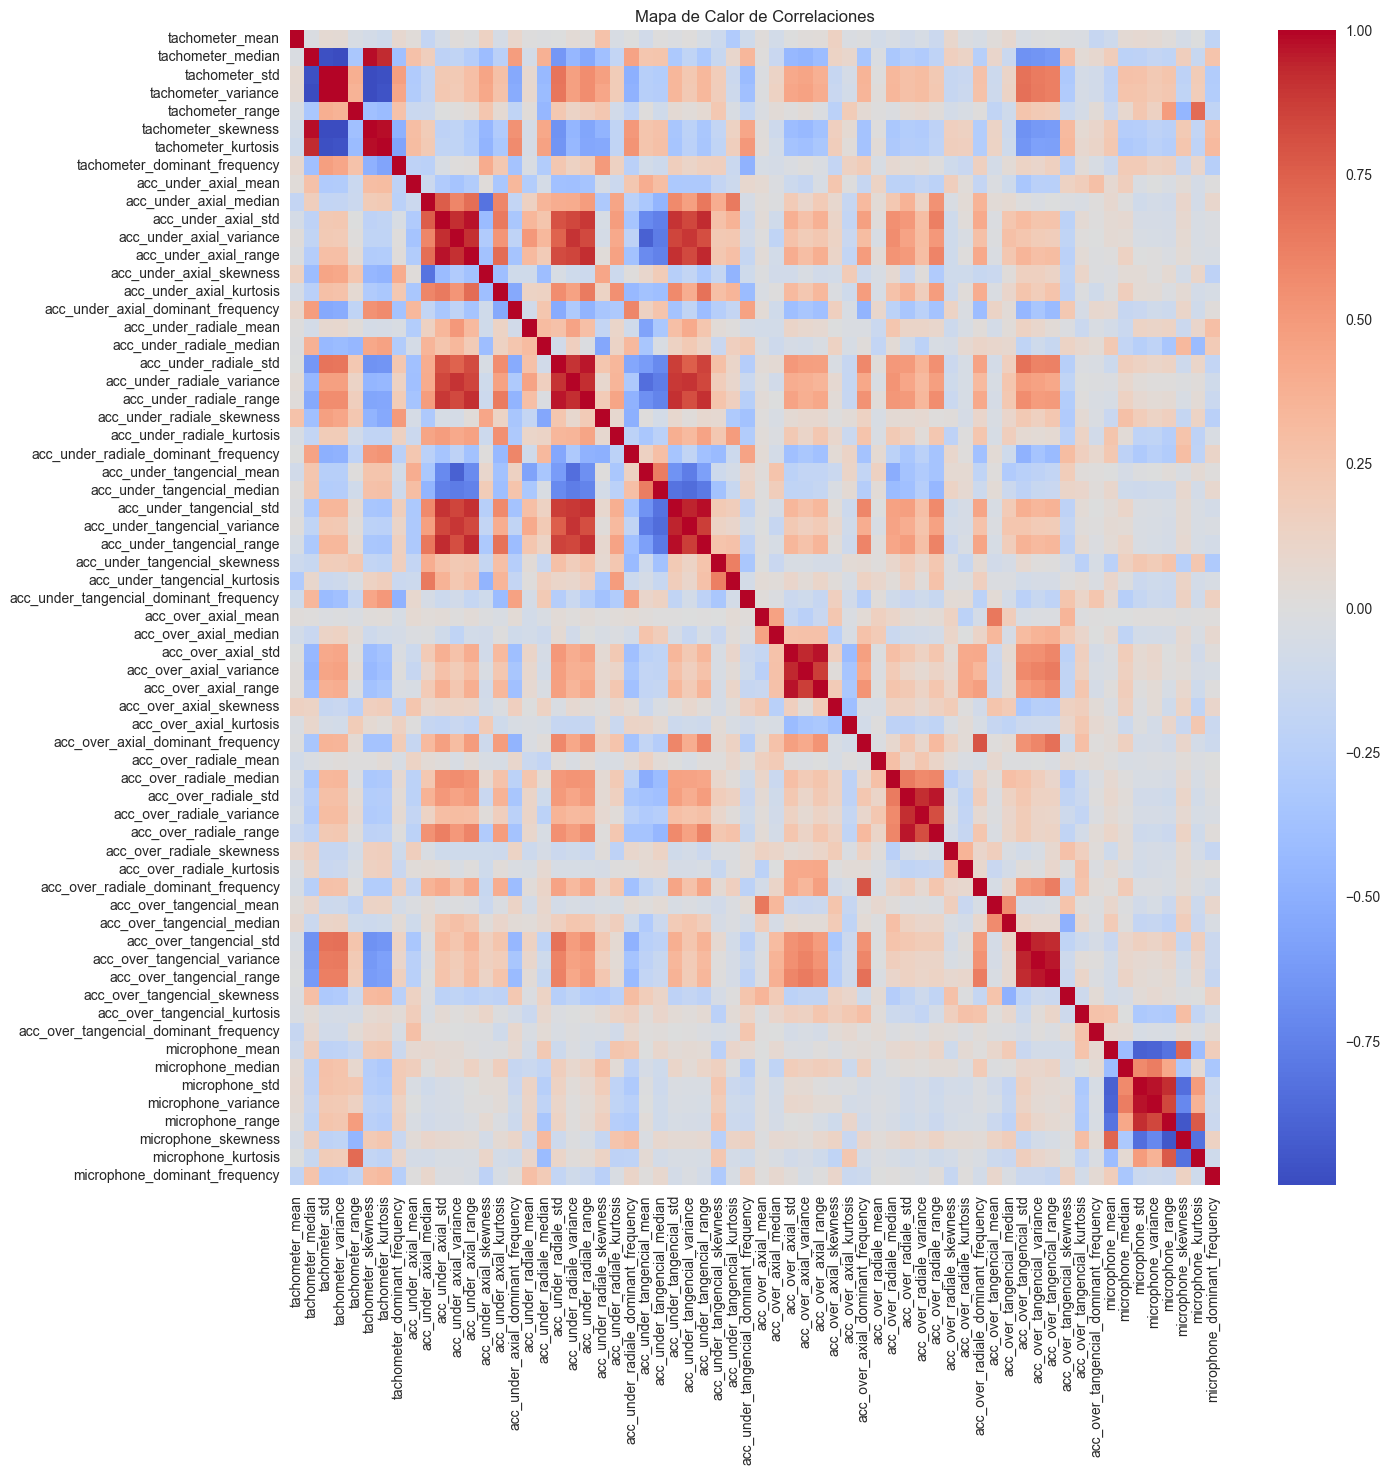


Highly correlated feature pairs (|correlation| > 0.9):
tachometer_median & tachometer_std: -0.981
tachometer_median & tachometer_variance: -0.992
tachometer_median & tachometer_skewness: 0.978
tachometer_median & tachometer_kurtosis: 0.927
tachometer_std & tachometer_variance: 0.997
tachometer_std & tachometer_skewness: -0.999
tachometer_std & tachometer_kurtosis: -0.980
tachometer_variance & tachometer_skewness: -0.995
tachometer_variance & tachometer_kurtosis: -0.964
tachometer_skewness & tachometer_kurtosis: 0.984
acc_under_axial_std & acc_under_axial_variance: 0.918
acc_under_axial_std & acc_under_axial_range: 0.977
acc_under_axial_std & acc_under_tangencial_std: 0.901
acc_under_axial_std & acc_under_tangencial_range: 0.922
acc_under_axial_variance & acc_under_axial_range: 0.907
acc_under_axial_variance & acc_under_radiale_variance: 0.904
acc_under_axial_variance & acc_under_tangencial_mean: -0.901
acc_under_axial_range & acc_under_radiale_range: 0.918
acc_under_axial_range & acc_

In [116]:
import seaborn as sns

# Carga el archivo CSV
ruta_csv = 'combined_statistics.csv'  # Cambia esto por la ruta de tu archivo
df = pd.read_csv(ruta_csv)


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Calcula la matriz de correlación
correlaciones = X.corr()

# Configura el tamaño del gráfico
plt.figure(figsize=(15, 15))

# Genera el mapa de calor
sns.heatmap(correlaciones, annot=False, cmap='coolwarm', cbar=True)

# Personaliza el gráfico
plt.title('Mapa de Calor de Correlaciones')
plt.show()

# Buscar pares de características altamente correlacionadas (|correlation| > 0.9)
print("\nHighly correlated feature pairs (|correlation| > 0.9):")
high_corr = np.where(np.abs(correlaciones) > 0.9)

# Imprimir las parejas, asegurando que no se repitan (i < j evita duplicados y la diagonal)
for i, j in zip(*high_corr):
    if i < j:
        print(f"{correlaciones.index[i]} & {correlaciones.columns[j]}: {correlaciones.iloc[i, j]:.3f}")


Como en la imagen no se ve muy claro, las ordenaré de mayor a menor en absoluto

Las que están más correlados son las que no las necesitamos, ya que los dos nos darían la misma o muy parecida información.

In [94]:
correlaciones_desordenadas = correlaciones.unstack()
correlaciones_ordenadas = correlaciones_desordenadas.abs().sort_values(ascending=False)

correlaciones_filtradas = correlaciones_ordenadas[correlaciones_ordenadas.index.get_level_values(0) != correlaciones_ordenadas.index.get_level_values(1)]

print("Correlaciones más fuertes:")
print(len(correlaciones_filtradas))
print(correlaciones_filtradas.head(4032)) #aqui ponemos las correlaciones que queremos

Correlaciones más fuertes:
4032
tachometer_skewness      tachometer_std             0.999238
tachometer_std           tachometer_skewness        0.999238
tachometer_variance      tachometer_std             0.997455
tachometer_std           tachometer_variance        0.997455
tachometer_skewness      tachometer_variance        0.995284
                                                      ...   
acc_over_axial_mean      microphone_median          0.000258
acc_under_radiale_mean   acc_over_axial_skewness    0.000114
acc_over_axial_skewness  acc_under_radiale_mean     0.000114
acc_over_axial_std       tachometer_mean            0.000007
tachometer_mean          acc_over_axial_std         0.000007
Length: 4032, dtype: float64


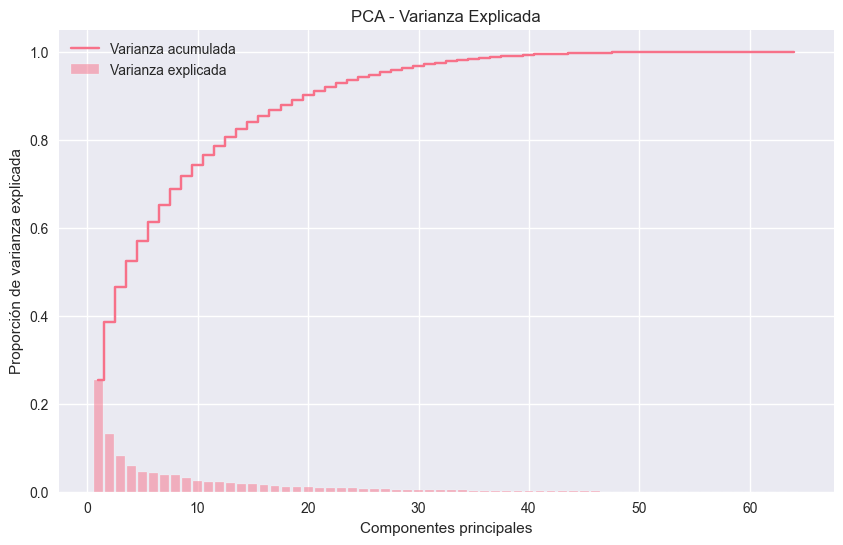

Varianza explicada por componente:
Componente 1: 0.2533
Componente 2: 0.1313
Componente 3: 0.0803
Componente 4: 0.0592
Componente 5: 0.0450
Componente 6: 0.0429
Componente 7: 0.0386
Componente 8: 0.0371
Componente 9: 0.0304
Componente 10: 0.0234
Componente 11: 0.0227
Componente 12: 0.0216
Componente 13: 0.0202
Componente 14: 0.0176
Componente 15: 0.0167
Componente 16: 0.0143
Componente 17: 0.0132
Componente 18: 0.0117
Componente 19: 0.0113
Componente 20: 0.0107
Componente 21: 0.0095
Componente 22: 0.0091
Componente 23: 0.0085
Componente 24: 0.0074
Componente 25: 0.0064
Componente 26: 0.0057
Componente 27: 0.0054
Componente 28: 0.0050
Componente 29: 0.0046
Componente 30: 0.0043
Componente 31: 0.0040
Componente 32: 0.0035
Componente 33: 0.0032
Componente 34: 0.0028
Componente 35: 0.0025
Componente 36: 0.0024
Componente 37: 0.0021
Componente 38: 0.0018
Componente 39: 0.0017
Componente 40: 0.0014
Componente 41: 0.0011
Componente 42: 0.0010
Componente 43: 0.0009
Componente 44: 0.0007
Compon

In [109]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ruta_csv = 'combined_statistics.csv'
df = pd.read_csv(ruta_csv)


# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)


plt.figure(figsize=(10, 6))
plt.bar(range(1, len(varianza_explicada) + 1), varianza_explicada, alpha=0.5, align='center', label='Varianza explicada')
plt.step(range(1, len(varianza_acumulada) + 1), varianza_acumulada, where='mid', label='Varianza acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de varianza explicada')
plt.title('PCA - Varianza Explicada')
plt.legend(loc='best')
plt.show()


print("Varianza explicada por componente:")
for i, var in enumerate(varianza_explicada, start=1):
    print(f"Componente {i}: {var:.4f}")

n_componentes_optimos = np.argmax(varianza_acumulada >= 0.9) + 1
print(f"\nNúmero óptimo de componentes para capturar el 90% de la varianza: {n_componentes_optimos}")

pca_optimo = PCA(n_components=n_componentes_optimos)
X_reducido = pca_optimo.fit_transform(X_scaled)

print(f"Conjunto de datos reducido a {n_componentes_optimos} componentes principales.")
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()


90% cogeremos en PCA --> 20 componentes

Con 20 componentes podemos explicar el 90% de la variabilidad

95% --> 27 componentes

In [96]:
# Obtener la matriz de componentes
loadings = pca.components_

# Crear un DataFrame para visualizar las contribuciones
loadings_df = pd.DataFrame(loadings, columns=X.columns)

In [97]:
loadings_df.head(20)

,tachometer_mean,tachometer_median,tachometer_std,tachometer_variance,tachometer_range,tachometer_skewness,tachometer_kurtosis,tachometer_dominant_frequency,acc_under_axial_mean,acc_under_axial_median,...,acc_over_tangencial_kurtosis,acc_over_tangencial_dominant_frequency,microphone_mean,microphone_median,microphone_std,microphone_variance,microphone_range,microphone_skewness,microphone_kurtosis,microphone_dominant_frequency
0,-0.000917,-0.169003,0.175954,0.174902,0.054739,-0.175326,-0.173609,0.071331,-0.104132,0.103867,...,-0.003700,-0.017310,-0.025428,0.056220,0.034347,0.028167,0.027750,-0.022800,0.019528,-0.042111
1,-0.043176,0.184028,-0.200056,-0.194648,-0.164158,0.200854,0.208958,-0.142931,-0.002792,0.221725,...,0.052717,0.027206,0.179700,-0.116217,-0.204245,-0.180361,-0.215056,0.205491,-0.172834,0.100389
2,-0.000146,0.102407,-0.080667,-0.087587,0.087685,0.081300,0.062173,0.002737,-0.030213,0.121067,...,-0.187978,-0.012672,-0.255019,0.113874,0.282128,0.262815,0.294321,-0.283818,0.213009,-0.015141
3,0.046433,-0.095273,0.112248,0.104303,0.048292,-0.116927,-0.133397,0.181281,-0.065593,-0.166553,...,-0.054539,-0.018305,0.180385,-0.114502,-0.168934,-0.190560,-0.155904,0.129911,-0.058521,-0.049793
4,-0.162010,0.041280,-0.022277,-0.032222,0.081895,0.015990,-0.009023,0.117156,0.004575,0.218969,...,0.016298,-0.032036,0.083159,0.017771,-0.071558,-0.087586,-0.044510,0.037745,0.018404,-0.090967
5,-0.022122,-0.036171,0.018433,0.028611,-0.102260,-0.012518,0.011481,-0.130437,0.114727,0.036931,...,-0.133272,0.005025,-0.086653,0.106380,0.074293,0.111907,0.021683,0.004200,-0.073252,0.049186
6,0.199385,0.027536,-0.006875,-0.017192,-0.163874,-0.002131,-0.027982,0.134462,0.178724,-0.032082,...,0.162450,-0.018433,-0.056546,0.318137,0.075280,0.111212,-0.040464,0.068574,-0.187166,-0.150145
7,0.130056,0.017084,-0.000733,-0.009261,-0.031064,-0.005669,-0.026032,0.134815,0.046573,-0.000431,...,0.150670,0.026424,-0.030314,0.107199,0.015420,0.014844,-0.010725,0.003379,-0.027815,-0.154990
8,-0.031229,0.058813,-0.050411,-0.051908,0.203858,0.053309,0.048262,-0.019570,0.251493,-0.025444,...,0.309407,0.328903,0.018152,0.061831,-0.063816,-0.081453,0.027753,-0.046601,0.148802,-0.204157
9,-0.091323,-0.052565,0.023489,0.037329,0.309549,-0.016681,0.017716,-0.121907,0.048711,0.037881,...,0.124958,0.009894,0.130435,-0.159737,-0.087712,-0.122910,0.069316,-0.103751,0.304411,-0.007733


In [98]:
# Filtrar las cargas con valor absoluto mayor que 0.4
filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)


# Imprimir las variables que cumplen la condición
for i in range(20):  # Iterar sobre las primeras 19 componentes
    print(f"Componente Principal {i+1}:")
    print(filtered_loadings.loc[i].dropna())
    print("\n")

Componente Principal 1:
acc_under_axial_range         0.206812
acc_under_radiale_std         0.238527
acc_under_radiale_variance    0.213323
acc_under_radiale_range       0.233239
acc_under_tangencial_std      0.209431
acc_under_tangencial_range    0.209155
Name: 0, dtype: float64


Componente Principal 2:
tachometer_std             -0.200056
tachometer_skewness         0.200854
tachometer_kurtosis         0.208958
acc_under_axial_median      0.221725
acc_under_axial_skewness   -0.207610
acc_under_radiale_median    0.221161
microphone_std             -0.204245
microphone_range           -0.215056
microphone_skewness         0.205491
Name: 1, dtype: float64


Componente Principal 3:
acc_over_tangencial_range   -0.206711
microphone_mean             -0.255019
microphone_std               0.282128
microphone_variance          0.262815
microphone_range             0.294321
microphone_skewness         -0.283818
microphone_kurtosis          0.213009
Name: 2, dtype: float64


Componente Princi

C:\Users\hodei\AppData\Local\Temp\ipykernel_19144\3005809403.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_loadings = loadings_df.applymap(lambda x: x if abs(x) > 0.2 else None)


In [76]:
# Lista para almacenar los nombres de las variables con alta contribución
variables_importantes = []

# Filtrar las cargas con valor absoluto mayor que 0.4 y acumular los nombres de las variables
for i in range(20):  # Iterar sobre las primeras 19 componentes
    print(f"Componente Principal {i+1}:")
    high_contrib = loadings_df.loc[i].abs().sort_values(ascending=False).head(4)
    print(high_contrib)
    print("\n")

    # Agregar a la lista solo si no está ya en la lista
    for variable in high_contrib.index:
        if variable not in variables_importantes:
            variables_importantes.append(variable)

# Mostrar todas las variables que tuvieron una alta contribución
print("Variables con alta contribución en las primeras 19 componentes principales:")
print(variables_importantes)
print(len(variables_importantes))

Componente Principal 1:
acc_under_radiale_std         0.238527
acc_under_radiale_range       0.233239
acc_under_radiale_variance    0.213323
acc_under_tangencial_std      0.209431
Name: 0, dtype: float64


Componente Principal 2:
acc_under_axial_median      0.221725
acc_under_radiale_median    0.221161
microphone_range            0.215056
tachometer_kurtosis         0.208958
Name: 1, dtype: float64


Componente Principal 3:
microphone_range       0.294321
microphone_skewness    0.283818
microphone_std         0.282128
microphone_variance    0.262815
Name: 2, dtype: float64


Componente Principal 4:
acc_under_axial_skewness    0.256956
acc_over_axial_range        0.256424
acc_over_axial_std          0.251727
acc_over_axial_variance     0.245747
Name: 3, dtype: float64


Componente Principal 5:
acc_under_tangencial_kurtosis              0.357729
acc_under_tangencial_skewness              0.315925
acc_under_tangencial_mean                  0.238821
acc_under_tangencial_dominant_frequency 

hurrengo pausok (lehenengo in reduced txikikin ta geo ya reduced haundikin ta geo ya kon toooodas):

-elegir las variables

-balanceo de datos

-entrenar

sartu bariable danak eredun ta kusi ean importantzie jakitteko zein kendu ta zein ez

eneko: random forest

como estamos haciendo no fallo vs cada fallo, no fallo vs fallo, los datos ya están balanceados, por lo que no hay que balancearlos de antemano, ya que para cada grupo hay 4 datos.

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)


# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
#stratify --> y bakoitza 80%-tan banatzeko


# # Hiperparámetros para Random Forest
# rf_param_grid = {
#     'n_estimators': range(50, 200, 10),
#     'max_depth': range(1,30,2),
#     'min_samples_split': range(2,60,2),
#     'min_samples_leaf': range(1,60,2),
# }
#
# # GridSearchCV para encontrar los mejores hiperparámetros
# print("Optimizing Random Forest...")
# rf_grid_search = GridSearchCV(
#     RandomForestClassifier(random_state=42),
#     param_grid=rf_param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=2
# )
# rf_grid_search.fit(X_train, y_train)
# print(f"Best Random Forest Params: {rf_grid_search.best_params_}")


In [ ]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Definir la función objetivo para Optuna
def objective(trial):
    # Definir los hiperparámetros que Optuna va a optimizar
    n_estimators = trial.randint('n_estimators', 50, 200)  # entre 50 y 200
    max_depth = trial.randint('max_depth', 1, 30)  # entre 1 y 30
    min_samples_split = trial.randint('min_samples_split', 2, 60)  # entre 2 y 60
    min_samples_leaf = trial.randint('min_samples_leaf', 1, 60)  # entre 1 y 60

    # Crear el clasificador RandomForest con los hiperparámetros seleccionados
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Realizar la validación cruzada y obtener la puntuación
    score = cross_val_score(rf, X_train, y_train, n_jobs=-1, cv=5, scoring='accuracy')

    # Devolver la puntuación media de la validación cruzada
    return score.mean()

# Crear el estudio de Optuna
study = optuna.create_study(direction='maximize')  # Buscamos maximizar la precisión
study.optimize(objective, n_trials=100)  # Probar 100 configuraciones diferentes

# Mostrar los mejores hiperparámetros encontrados por Optuna
print("Best Random Forest Params:", study.best_params)


In [125]:
# Entrenamiento con los mejores parámetros
best_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=50, random_state=42)
best_rf.fit(X_train, y_train)

# Realizar predicciones y evaluación
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))


Classification Report (Training):
                                        precision    recall  f1-score   support

                         ball_fault_0g       1.00      1.00      1.00         7
                        ball_fault_20g       1.00      0.86      0.92         7
                        ball_fault_35g       0.88      1.00      0.93         7
                         ball_fault_6g       1.00      1.00      1.00         6
bearing_fault_detection_reduced_normal       1.00      1.00      1.00         3
                         cage_fault_0g       1.00      1.00      1.00         6
                        cage_fault_20g       1.00      1.00      1.00         7
                        cage_fault_35g       1.00      1.00      1.00         6
                         cage_fault_6g       1.00      1.00      1.00         6
         horizontal-misalignment_0.5mm       1.00      1.00      1.00         3
         horizontal-misalignment_1.0mm       1.00      1.00      1.00         3
    

C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r


Feature Importance Analysis:


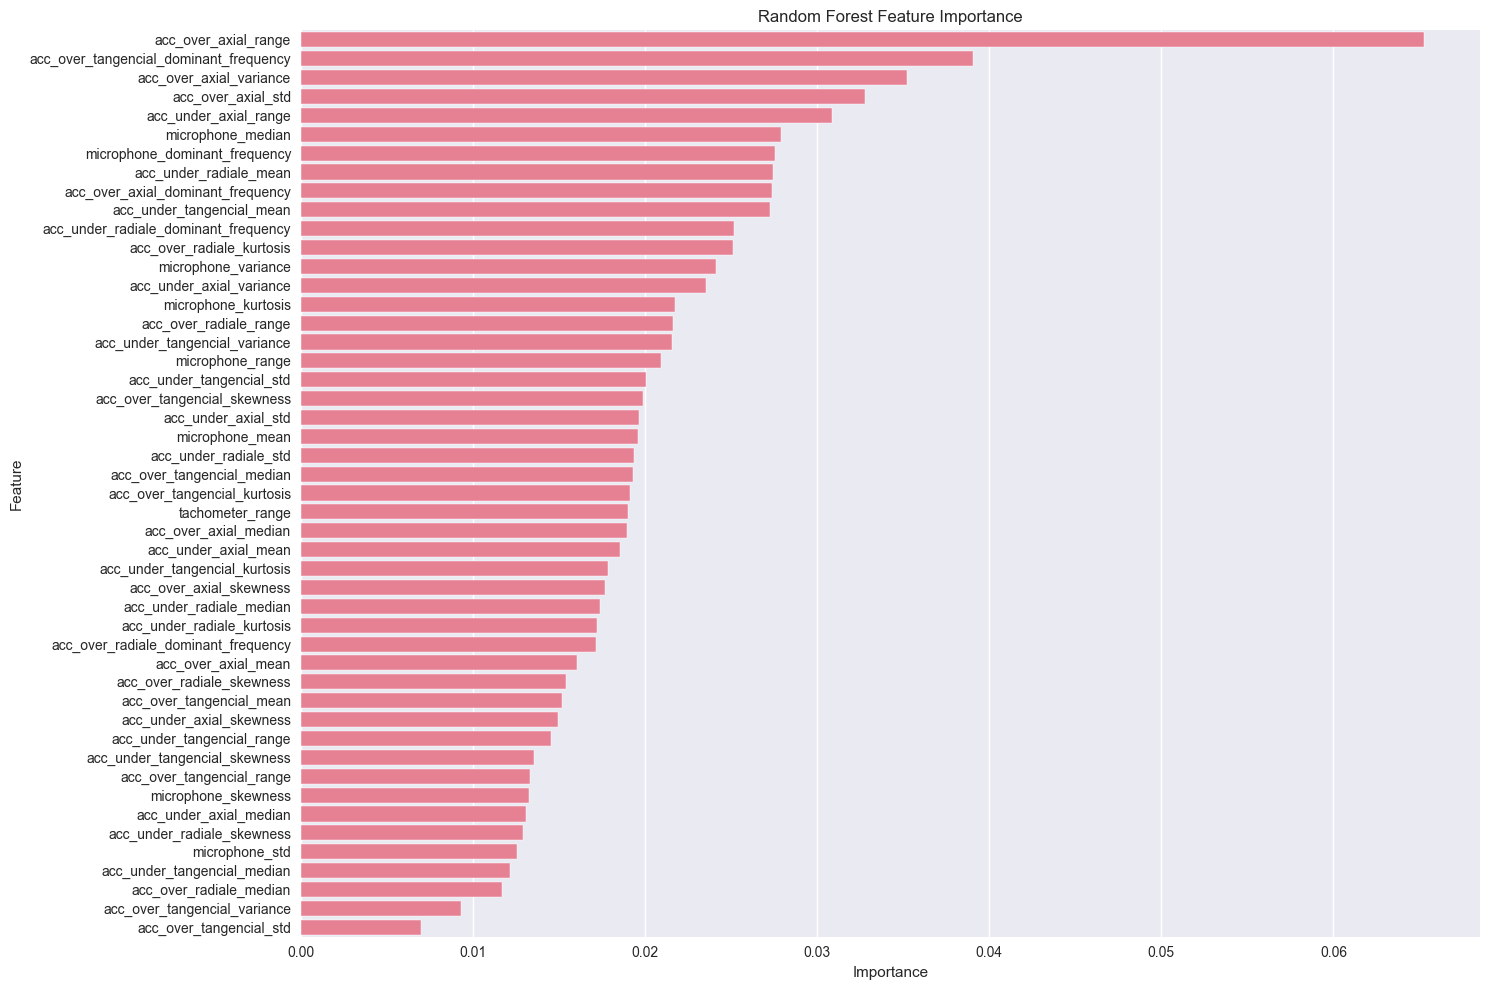


Feature Importance Ranking:
                                   feature  importance
1                     acc_over_axial_range    0.065258
7   acc_over_tangencial_dominant_frequency    0.039039
13                 acc_over_axial_variance    0.035206
3                       acc_over_axial_std    0.032767
4                    acc_under_axial_range    0.030845
0                        microphone_median    0.027883
14           microphone_dominant_frequency    0.027540
41                  acc_under_radiale_mean    0.027411
39       acc_over_axial_dominant_frequency    0.027379
2                acc_under_tangencial_mean    0.027246
5     acc_under_radiale_dominant_frequency    0.025153
35               acc_over_radiale_kurtosis    0.025091
40                     microphone_variance    0.024143
9                 acc_under_axial_variance    0.023542
11                     microphone_kurtosis    0.021751
16                  acc_over_radiale_range    0.021601
19           acc_under_tangencial_va

In [126]:
def plot_feature_importance(model, feature_names, title="Feature Importance"):
    """
    Plot feature importance
    """
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(15, 10))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return importances

print("\nFeature Importance Analysis:")
importance_df = plot_feature_importance(best_rf, X.columns,
                                     "Random Forest Feature Importance")
print("\nFeature Importance Ranking:")
print(importance_df)

Para la explicación de la varianza escogeremos 90% de importancia.

In [129]:
# Calcular la suma total de importancias
total_importance = importance_df['importance'].sum()
# print(total_importance) --> efektibamente da 1

# Seleccionar características cuya suma de importancia sea el 90% del total
cumulative_importance = importance_df['importance'].cumsum()
selected_features = importance_df[cumulative_importance <= total_importance * 0.9]

print("\nSelected Features (90% of importance):")
print(selected_features)


Selected Features (90% of importance):
                                   feature  importance
1                     acc_over_axial_range    0.065258
7   acc_over_tangencial_dominant_frequency    0.039039
13                 acc_over_axial_variance    0.035206
3                       acc_over_axial_std    0.032767
4                    acc_under_axial_range    0.030845
0                        microphone_median    0.027883
14           microphone_dominant_frequency    0.027540
41                  acc_under_radiale_mean    0.027411
39       acc_over_axial_dominant_frequency    0.027379
2                acc_under_tangencial_mean    0.027246
5     acc_under_radiale_dominant_frequency    0.025153
35               acc_over_radiale_kurtosis    0.025091
40                     microphone_variance    0.024143
9                 acc_under_axial_variance    0.023542
11                     microphone_kurtosis    0.021751
16                  acc_over_radiale_range    0.021601
19           acc_under_ta

In [130]:
X = X[selected_features['feature']]
# X_scaled = StandardScaler().fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf.fit(X_train, y_train)

# Realizar predicciones y evaluación
rf_train_pred = best_rf.predict(X_train)
rf_test_pred = best_rf.predict(X_test)

print("\nClassification Report (Training):")
print(classification_report(y_train, rf_train_pred))

print("\nClassification Report (Testing):")
print(classification_report(y_test, rf_test_pred))


Classification Report (Training):
                                        precision    recall  f1-score   support

                         ball_fault_0g       1.00      1.00      1.00         6
                        ball_fault_20g       1.00      1.00      1.00         7
                        ball_fault_35g       1.00      1.00      1.00         6
                         ball_fault_6g       1.00      1.00      1.00         4
bearing_fault_detection_reduced_normal       1.00      1.00      1.00         3
                         cage_fault_0g       0.89      1.00      0.94         8
                        cage_fault_20g       1.00      1.00      1.00         6
                        cage_fault_35g       1.00      0.71      0.83         7
                         cage_fault_6g       0.88      1.00      0.93         7
         horizontal-misalignment_0.5mm       1.00      1.00      1.00         4
         horizontal-misalignment_1.0mm       1.00      1.00      1.00         4
    

C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hodei\.conda\envs\PythonProject\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


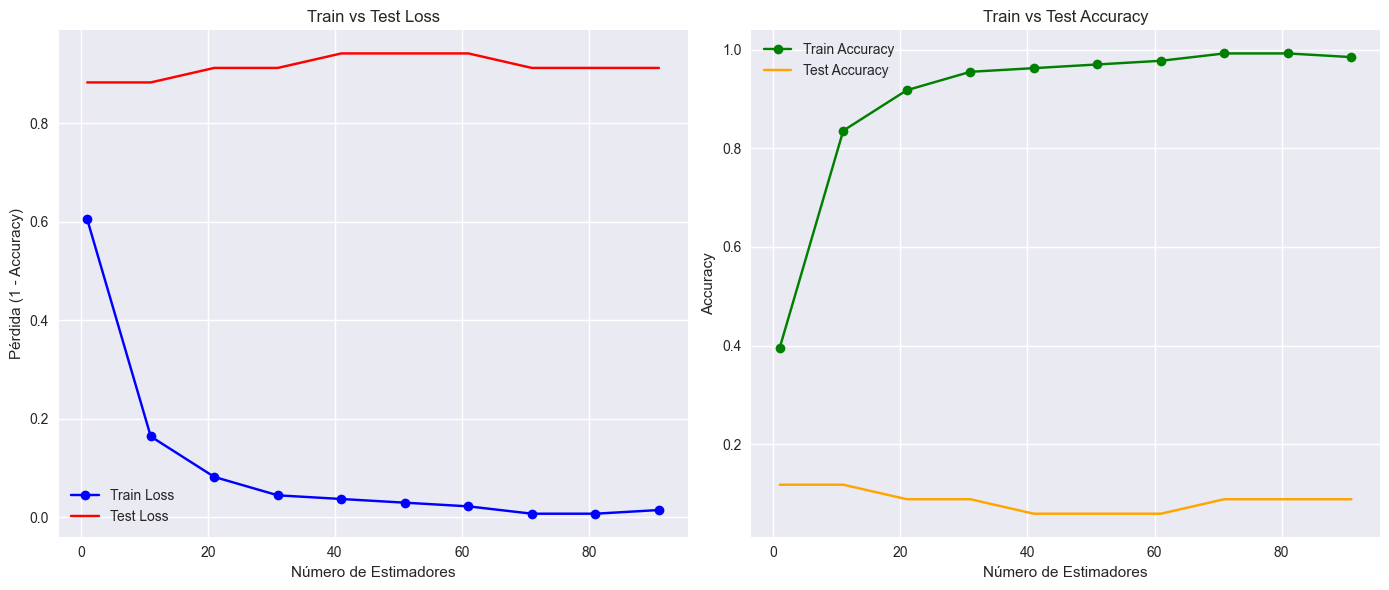

In [131]:
# Visualización de pérdida y precisión
train_loss = []
test_loss = []
train_accuracy = []
test_accuracy = []

# Variar el número de estimadores y registrar métricas
for n_estimators in range(1, 101, 10):
    best_rf.set_params(n_estimators=n_estimators)
    best_rf.fit(X_train, y_train)

    # Predicciones
    train_pred = best_rf.predict(X_train)
    test_pred = best_rf.predict(X_test)

    # Calcular pérdida (1 - accuracy)
    train_loss.append(1 - accuracy_score(y_train, train_pred))
    test_loss.append(1 - accuracy_score(y_test, test_pred))

    # Calcular accuracy
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))

# Graficar resultados
fig, ax1 = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Train Loss y Test Loss
ax1[0].plot(range(1, 101, 10), train_loss, label='Train Loss', color='blue', marker='o')
ax1[0].plot(range(1, 101, 10), test_loss, label='Test Loss', color='red', marker='x')
ax1[0].set_xlabel('Número de Estimadores')
ax1[0].set_ylabel('Pérdida (1 - Accuracy)')
ax1[0].set_title('Train vs Test Loss')
ax1[0].legend()

# Gráfico 2: Train Accuracy y Test Accuracy
ax1[1].plot(range(1, 101, 10), train_accuracy, label='Train Accuracy', color='green', marker='o')
ax1[1].plot(range(1, 101, 10), test_accuracy, label='Test Accuracy', color='orange', marker='x')
ax1[1].set_xlabel('Número de Estimadores')
ax1[1].set_ylabel('Accuracy')
ax1[1].set_title('Train vs Test Accuracy')
ax1[1].legend()

plt.tight_layout()
plt.show()

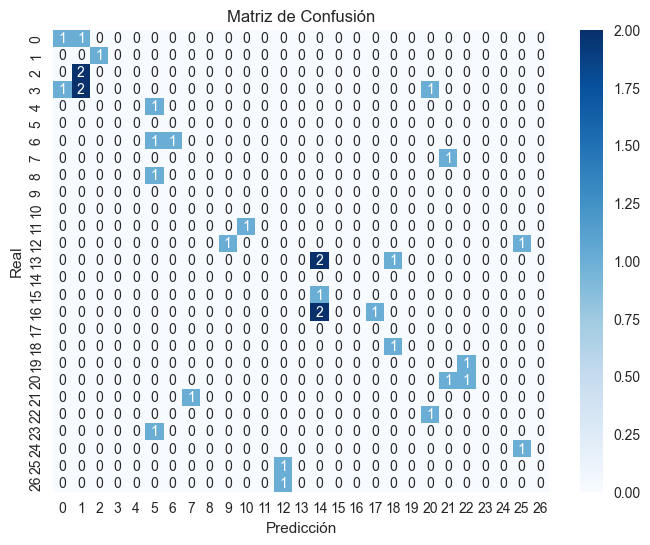

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones en conjunto de test
rf_test_pred = best_rf.predict(X_test)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_test, rf_test_pred)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()
